In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('../../Datasets/Lynx_Hare/data.csv', usecols=['DATE', 'HARE', 'LYNX'])
print(df)

    DATE   HARE   LYNX
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


In [32]:
X = df[['DATE']] 
y = df[['HARE', 'LYNX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

    DATE
64  1909
15  1860
67  1912
77  1922
30  1875
..   ...
20  1865
60  1905
71  1916
14  1859
51  1896

[72 rows x 1 columns]
     HARE   LYNX
0   19.58  30.09
1   19.60  45.15
2   19.61  49.15
3   11.99  39.52
4   28.04  21.23
..    ...    ...
86  19.52   8.31
87  82.11  16.01
88  89.76  24.82
89  81.66  29.70
90  15.76  35.40

[91 rows x 2 columns]


In [33]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.0267, Test MSE: 1.2859
Epoch 2/200, Training MSE: 1.0140, Test MSE: 1.2737
Epoch 3/200, Training MSE: 1.0029, Test MSE: 1.2620
Epoch 4/200, Training MSE: 0.9934, Test MSE: 1.2504
Epoch 5/200, Training MSE: 0.9861, Test MSE: 1.2416
Epoch 6/200, Training MSE: 0.9801, Test MSE: 1.2335
Epoch 7/200, Training MSE: 0.9755, Test MSE: 1.2280
Epoch 8/200, Training MSE: 0.9720, Test MSE: 1.2233
Epoch 9/200, Training MSE: 0.9700, Test MSE: 1.2220
Epoch 10/200, Training MSE: 0.9682, Test MSE: 1.2159
Epoch 11/200, Training MSE: 0.9669, Test MSE: 1.2169
Epoch 12/200, Training MSE: 0.9660, Test MSE: 1.2135
Epoch 13/200, Training MSE: 0.9654, Test MSE: 1.2182
Epoch 14/200, Training MSE: 0.9646, Test MSE: 1.2133
Epoch 15/200, Training MSE: 0.9643, Test MSE: 1.2177
Epoch 16/200, Training MSE: 0.9634, Test MSE: 1.2125
Epoch 17/200, Training MSE: 0.9633, Test MSE: 1.2166


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 18/200, Training MSE: 0.9623, Test MSE: 1.2120
Epoch 19/200, Training MSE: 0.9622, Test MSE: 1.2155
Epoch 20/200, Training MSE: 0.9614, Test MSE: 1.2110
Epoch 21/200, Training MSE: 0.9614, Test MSE: 1.2147
Epoch 22/200, Training MSE: 0.9604, Test MSE: 1.2113
Epoch 23/200, Training MSE: 0.9605, Test MSE: 1.2141
Epoch 24/200, Training MSE: 0.9596, Test MSE: 1.2099
Epoch 25/200, Training MSE: 0.9597, Test MSE: 1.2134
Epoch 26/200, Training MSE: 0.9589, Test MSE: 1.2099
Epoch 27/200, Training MSE: 0.9591, Test MSE: 1.2130
Epoch 28/200, Training MSE: 0.9582, Test MSE: 1.2089
Epoch 29/200, Training MSE: 0.9583, Test MSE: 1.2127
Epoch 30/200, Training MSE: 0.9575, Test MSE: 1.2097
Epoch 31/200, Training MSE: 0.9575, Test MSE: 1.2113
Epoch 32/200, Training MSE: 0.9568, Test MSE: 1.2085
Epoch 33/200, Training MSE: 0.9569, Test MSE: 1.2113
Epoch 34/200, Training MSE: 0.9562, Test MSE: 1.2076
Epoch 35/200, Training MSE: 0.9563, Test MSE: 1.2109
Epoch 36/200, Training MSE: 0.9556, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 124/200, Training MSE: 0.9383, Test MSE: 1.2007
Epoch 125/200, Training MSE: 0.9381, Test MSE: 1.2035
Epoch 126/200, Training MSE: 0.9379, Test MSE: 1.2007
Epoch 127/200, Training MSE: 0.9378, Test MSE: 1.2030
Epoch 128/200, Training MSE: 0.9377, Test MSE: 1.2004
Epoch 129/200, Training MSE: 0.9375, Test MSE: 1.2039
Epoch 130/200, Training MSE: 0.9374, Test MSE: 1.2005
Epoch 131/200, Training MSE: 0.9372, Test MSE: 1.2037
Epoch 132/200, Training MSE: 0.9371, Test MSE: 1.2009
Epoch 133/200, Training MSE: 0.9368, Test MSE: 1.2031
Epoch 134/200, Training MSE: 0.9368, Test MSE: 1.2000
Epoch 135/200, Training MSE: 0.9365, Test MSE: 1.2035
Epoch 136/200, Training MSE: 0.9365, Test MSE: 1.2005
Epoch 137/200, Training MSE: 0.9362, Test MSE: 1.2034
Epoch 138/200, Training MSE: 0.9362, Test MSE: 1.2006
Epoch 139/200, Training MSE: 0.9361, Test MSE: 1.2028
Epoch 140/200, Training MSE: 0.9360, Test MSE: 1.2014
Epoch 141/200, Training MSE: 0.9358, Test MSE: 1.2030
Epoch 142/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

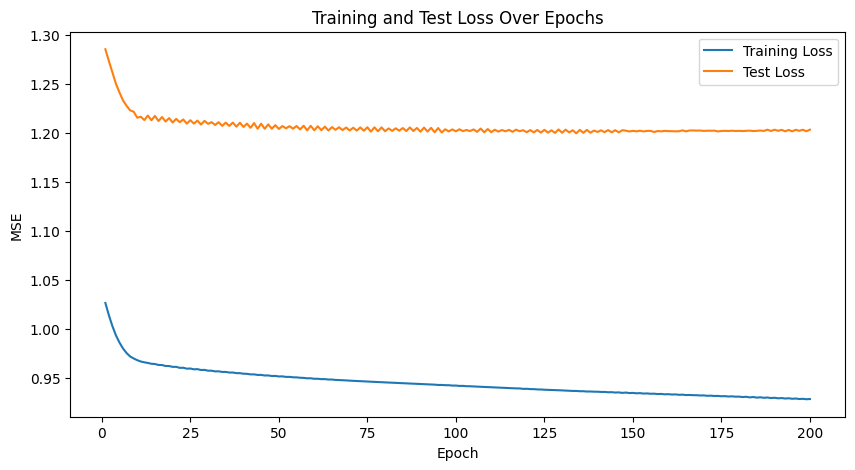

Final Test MSE: 1.2036884296046206


In [34]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [35]:
df = pd.read_csv('../../Datasets/study_373/top_5_373.csv', usecols=['DATE', '46670', '46982', '46504', '46571', '46888'])

df['DATE'] = pd.to_datetime(df['DATE'])
reference_date = df['DATE'].min()
df['DAYS'] = (df['DATE'] - reference_date).dt.days
print(df)

          DATE  46670  46982  46504  46571  46888  DAYS
0   2008-06-08    1.0    2.0    1.0    1.0    2.0     0
1   2008-07-11    1.0    3.0    1.0    1.0    2.0    33
2   2008-09-14    2.0    6.0    2.0    1.0    1.0    98
3   2008-09-16    2.0    1.0    1.0    1.0    3.0   100
4   2008-09-22    2.0    4.0    1.0    1.0    2.0   106
..         ...    ...    ...    ...    ...    ...   ...
388 2012-10-18   10.0    6.0    1.0    1.0    2.0  1593
389 2012-10-22    8.0    6.0    1.0    1.0    3.0  1597
390 2012-10-28    3.0    1.0    1.0    1.0    2.0  1603
391 2012-11-08    2.0    7.0    1.0    1.0    2.0  1614
392 2012-11-09    2.0    1.0    1.0    1.0    1.0  1615

[393 rows x 7 columns]


In [36]:
X = df[['DAYS']]
y = df[['46670', '46982', '46504', '46571', '46888']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

     DAYS
329  1449
182   764
172   750
63    397
341  1480
..    ...
71    416
106   484
270  1123
348  1492
102   474

[314 rows x 1 columns]
     46670  46982  46504  46571  46888
0      1.0    2.0    1.0    1.0    2.0
1      1.0    3.0    1.0    1.0    2.0
2      2.0    6.0    2.0    1.0    1.0
3      2.0    1.0    1.0    1.0    3.0
4      2.0    4.0    1.0    1.0    2.0
..     ...    ...    ...    ...    ...
388   10.0    6.0    1.0    1.0    2.0
389    8.0    6.0    1.0    1.0    3.0
390    3.0    1.0    1.0    1.0    2.0
391    2.0    7.0    1.0    1.0    2.0
392    2.0    1.0    1.0    1.0    1.0

[393 rows x 5 columns]


In [37]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.0784, Test MSE: 1.0817
Epoch 2/200, Training MSE: 1.0542, Test MSE: 1.0551
Epoch 3/200, Training MSE: 1.0353, Test MSE: 1.0343
Epoch 4/200, Training MSE: 1.0205, Test MSE: 1.0183
Epoch 5/200, Training MSE: 1.0088, Test MSE: 1.0056
Epoch 6/200, Training MSE: 0.9995, Test MSE: 0.9964
Epoch 7/200, Training MSE: 0.9924, Test MSE: 0.9899
Epoch 8/200, Training MSE: 0.9866, Test MSE: 0.9840
Epoch 9/200, Training MSE: 0.9822, Test MSE: 0.9809
Epoch 10/200, Training MSE: 0.9788, Test MSE: 0.9772
Epoch 11/200, Training MSE: 0.9763, Test MSE: 0.9752
Epoch 12/200, Training MSE: 0.9743, Test MSE: 0.9731
Epoch 13/200, Training MSE: 0.9728, Test MSE: 0.9724
Epoch 14/200, Training MSE: 0.9719, Test MSE: 0.9703
Epoch 15/200, Training MSE: 0.9707, Test MSE: 0.9711
Epoch 16/200, Training MSE: 0.9698, Test MSE: 0.9694
Epoch 17/200, Training MSE: 0.9687, Test MSE: 0.9693
Epoch 18/200, Training MSE: 0.9679, Test MSE: 0.9683
Epoch 19/200, Training MSE: 0.9669, Test MSE: 0.9684
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 50/200, Training MSE: 0.9402, Test MSE: 0.9554
Epoch 51/200, Training MSE: 0.9395, Test MSE: 0.9570
Epoch 52/200, Training MSE: 0.9388, Test MSE: 0.9553
Epoch 53/200, Training MSE: 0.9386, Test MSE: 0.9559
Epoch 54/200, Training MSE: 0.9375, Test MSE: 0.9560
Epoch 55/200, Training MSE: 0.9371, Test MSE: 0.9555
Epoch 56/200, Training MSE: 0.9365, Test MSE: 0.9547
Epoch 57/200, Training MSE: 0.9357, Test MSE: 0.9558
Epoch 58/200, Training MSE: 0.9350, Test MSE: 0.9550
Epoch 59/200, Training MSE: 0.9342, Test MSE: 0.9561
Epoch 60/200, Training MSE: 0.9337, Test MSE: 0.9546
Epoch 61/200, Training MSE: 0.9332, Test MSE: 0.9554
Epoch 62/200, Training MSE: 0.9323, Test MSE: 0.9552
Epoch 63/200, Training MSE: 0.9318, Test MSE: 0.9553
Epoch 64/200, Training MSE: 0.9311, Test MSE: 0.9543
Epoch 65/200, Training MSE: 0.9307, Test MSE: 0.9555
Epoch 66/200, Training MSE: 0.9299, Test MSE: 0.9549
Epoch 67/200, Training MSE: 0.9294, Test MSE: 0.9552
Epoch 68/200, Training MSE: 0.9286, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 130/200, Training MSE: 0.9035, Test MSE: 0.9462
Epoch 131/200, Training MSE: 0.9035, Test MSE: 0.9484
Epoch 132/200, Training MSE: 0.9032, Test MSE: 0.9490
Epoch 133/200, Training MSE: 0.9031, Test MSE: 0.9489
Epoch 134/200, Training MSE: 0.9026, Test MSE: 0.9478
Epoch 135/200, Training MSE: 0.9024, Test MSE: 0.9474
Epoch 136/200, Training MSE: 0.9021, Test MSE: 0.9489
Epoch 137/200, Training MSE: 0.9016, Test MSE: 0.9478
Epoch 138/200, Training MSE: 0.9014, Test MSE: 0.9463
Epoch 139/200, Training MSE: 0.9012, Test MSE: 0.9476
Epoch 140/200, Training MSE: 0.9010, Test MSE: 0.9477
Epoch 141/200, Training MSE: 0.9007, Test MSE: 0.9472
Epoch 142/200, Training MSE: 0.9005, Test MSE: 0.9464
Epoch 143/200, Training MSE: 0.9008, Test MSE: 0.9477
Epoch 144/200, Training MSE: 0.8998, Test MSE: 0.9441
Epoch 145/200, Training MSE: 0.8993, Test MSE: 0.9457
Epoch 146/200, Training MSE: 0.8990, Test MSE: 0.9453
Epoch 147/200, Training MSE: 0.8989, Test MSE: 0.9456
Epoch 148/200, Training MSE:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 198/200, Training MSE: 0.8835, Test MSE: 0.9284
Epoch 199/200, Training MSE: 0.8830, Test MSE: 0.9325
Epoch 200/200, Training MSE: 0.8831, Test MSE: 0.9317


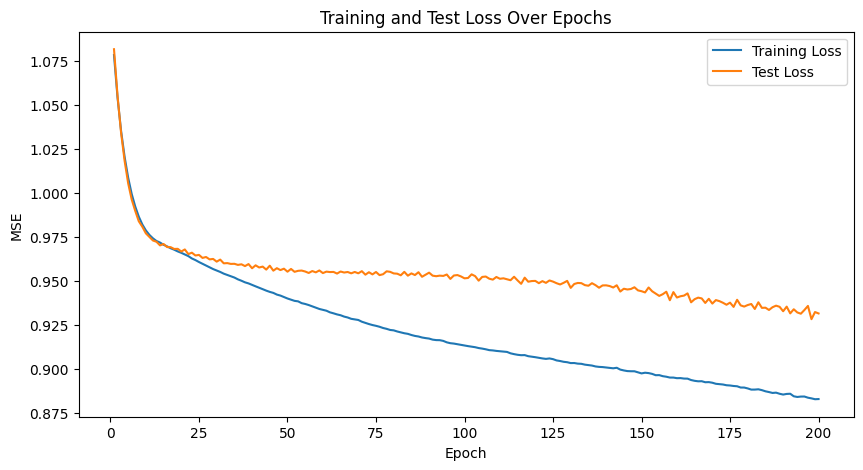

Final Test MSE: 0.9316910717461042


In [38]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [39]:
df = pd.read_csv('../../Datasets/study_213/top_5_213.csv', usecols=['DATE', '7058', '8572', '39601', '8901', '7730'])

df['DATE'] = pd.to_datetime(df['DATE'])
reference_date = df['DATE'].min()
df['DAYS'] = (df['DATE'] - reference_date).dt.days
print(df)

           DATE    7058   8572  39601   8901   7730   DAYS
0    1963-11-14  1531.0  422.0   19.0  164.0    2.0      0
1    1963-12-10   437.0   94.0   17.0   97.0    1.0     26
2    1964-10-25   189.0   66.0   36.0   23.0  761.0    346
3    1964-10-29   370.0  116.0   83.0  196.0  561.0    350
4    1964-12-04   101.0    5.0   21.0  233.0    2.0    386
...         ...     ...    ...    ...    ...    ...    ...
1510 2008-10-28   255.0   16.0  185.0   44.0   15.0  16420
1511 2008-10-30   741.0  735.0  252.0   87.0  382.0  16422
1512 2008-11-03   287.0  291.0   14.0   16.0    1.0  16426
1513 2008-11-04   732.0  468.0   32.0  186.0    1.0  16427
1514 2008-11-08    78.0    3.0  471.0    1.0   14.0  16431

[1515 rows x 7 columns]


In [40]:
X = df[['DAYS']]
y = df[['7058', '8572', '39601', '8901', '7730']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

       DAYS
869   10920
1280  14374
1334  14943
601    7629
590    7433
...     ...
1130  13240
1294  14566
860   10756
1459  16019
1126  13144

[1212 rows x 1 columns]
        7058   8572  39601   8901   7730
0     1531.0  422.0   19.0  164.0    2.0
1      437.0   94.0   17.0   97.0    1.0
2      189.0   66.0   36.0   23.0  761.0
3      370.0  116.0   83.0  196.0  561.0
4      101.0    5.0   21.0  233.0    2.0
...      ...    ...    ...    ...    ...
1510   255.0   16.0  185.0   44.0   15.0
1511   741.0  735.0  252.0   87.0  382.0
1512   287.0  291.0   14.0   16.0    1.0
1513   732.0  468.0   32.0  186.0    1.0
1514    78.0    3.0  471.0    1.0   14.0

[1515 rows x 5 columns]


In [41]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.0412, Test MSE: 1.6532
Epoch 2/200, Training MSE: 1.0070, Test MSE: 1.6143
Epoch 3/200, Training MSE: 0.9931, Test MSE: 1.5990
Epoch 4/200, Training MSE: 0.9885, Test MSE: 1.5941


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 5/200, Training MSE: 0.9868, Test MSE: 1.5918
Epoch 6/200, Training MSE: 0.9857, Test MSE: 1.5905
Epoch 7/200, Training MSE: 0.9848, Test MSE: 1.5895
Epoch 8/200, Training MSE: 0.9841, Test MSE: 1.5889
Epoch 9/200, Training MSE: 0.9835, Test MSE: 1.5886
Epoch 10/200, Training MSE: 0.9832, Test MSE: 1.5882
Epoch 11/200, Training MSE: 0.9828, Test MSE: 1.5876
Epoch 12/200, Training MSE: 0.9824, Test MSE: 1.5873
Epoch 13/200, Training MSE: 0.9822, Test MSE: 1.5872
Epoch 14/200, Training MSE: 0.9819, Test MSE: 1.5869
Epoch 15/200, Training MSE: 0.9818, Test MSE: 1.5867
Epoch 16/200, Training MSE: 0.9816, Test MSE: 1.5864
Epoch 17/200, Training MSE: 0.9814, Test MSE: 1.5864
Epoch 18/200, Training MSE: 0.9813, Test MSE: 1.5862
Epoch 19/200, Training MSE: 0.9811, Test MSE: 1.5860
Epoch 20/200, Training MSE: 0.9810, Test MSE: 1.5860
Epoch 21/200, Training MSE: 0.9809, Test MSE: 1.5859
Epoch 22/200, Training MSE: 0.9807, Test MSE: 1.5857
Epoch 23/200, Training MSE: 0.9806, Test MSE: 1.585

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 35/200, Training MSE: 0.9797, Test MSE: 1.5859
Epoch 36/200, Training MSE: 0.9796, Test MSE: 1.5855
Epoch 37/200, Training MSE: 0.9796, Test MSE: 1.5859
Epoch 38/200, Training MSE: 0.9796, Test MSE: 1.5859
Epoch 39/200, Training MSE: 0.9795, Test MSE: 1.5854
Epoch 40/200, Training MSE: 0.9795, Test MSE: 1.5857
Epoch 41/200, Training MSE: 0.9793, Test MSE: 1.5855
Epoch 42/200, Training MSE: 0.9794, Test MSE: 1.5854
Epoch 43/200, Training MSE: 0.9792, Test MSE: 1.5858
Epoch 44/200, Training MSE: 0.9792, Test MSE: 1.5853
Epoch 45/200, Training MSE: 0.9792, Test MSE: 1.5852
Epoch 46/200, Training MSE: 0.9791, Test MSE: 1.5856
Epoch 47/200, Training MSE: 0.9791, Test MSE: 1.5853
Epoch 48/200, Training MSE: 0.9790, Test MSE: 1.5853
Epoch 49/200, Training MSE: 0.9790, Test MSE: 1.5855
Epoch 50/200, Training MSE: 0.9790, Test MSE: 1.5849
Epoch 51/200, Training MSE: 0.9790, Test MSE: 1.5850
Epoch 52/200, Training MSE: 0.9788, Test MSE: 1.5854
Epoch 53/200, Training MSE: 0.9789, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 172/200, Training MSE: 0.9755, Test MSE: 1.5818
Epoch 173/200, Training MSE: 0.9751, Test MSE: 1.5818
Epoch 174/200, Training MSE: 0.9753, Test MSE: 1.5820
Epoch 175/200, Training MSE: 0.9752, Test MSE: 1.5818
Epoch 176/200, Training MSE: 0.9754, Test MSE: 1.5812
Epoch 177/200, Training MSE: 0.9751, Test MSE: 1.5821
Epoch 178/200, Training MSE: 0.9752, Test MSE: 1.5814
Epoch 179/200, Training MSE: 0.9753, Test MSE: 1.5815
Epoch 180/200, Training MSE: 0.9751, Test MSE: 1.5819
Epoch 181/200, Training MSE: 0.9752, Test MSE: 1.5820
Epoch 182/200, Training MSE: 0.9752, Test MSE: 1.5817
Epoch 183/200, Training MSE: 0.9751, Test MSE: 1.5817
Epoch 184/200, Training MSE: 0.9751, Test MSE: 1.5815
Epoch 185/200, Training MSE: 0.9749, Test MSE: 1.5823
Epoch 186/200, Training MSE: 0.9753, Test MSE: 1.5811
Epoch 187/200, Training MSE: 0.9749, Test MSE: 1.5815
Epoch 188/200, Training MSE: 0.9750, Test MSE: 1.5812
Epoch 189/200, Training MSE: 0.9747, Test MSE: 1.5812
Epoch 190/200, Training MSE:

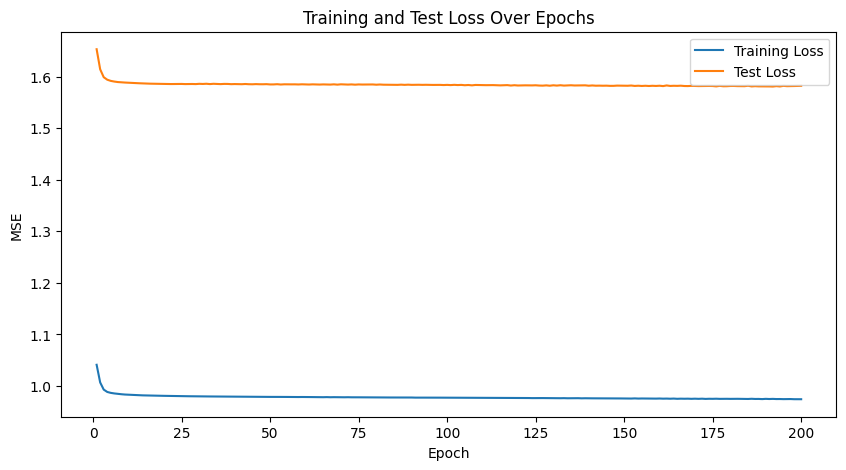

Final Test MSE: 1.582218709816976


In [42]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')